In [20]:
pip install scikit-learn

In [22]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#import scikitplot as skplt
import numpy as np


In [7]:
# Step 1: Load and preprocess the data
data = pd.read_csv('/content/train.csv')
data.dropna(inplace=True)
label_encoder = LabelEncoder()
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])
features = data[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Payment_Behaviour']]
target = data['Credit_Score']

<ipython-input-7-f4bd4b437412>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/train.csv')


<Figure size 1200x800 with 0 Axes>

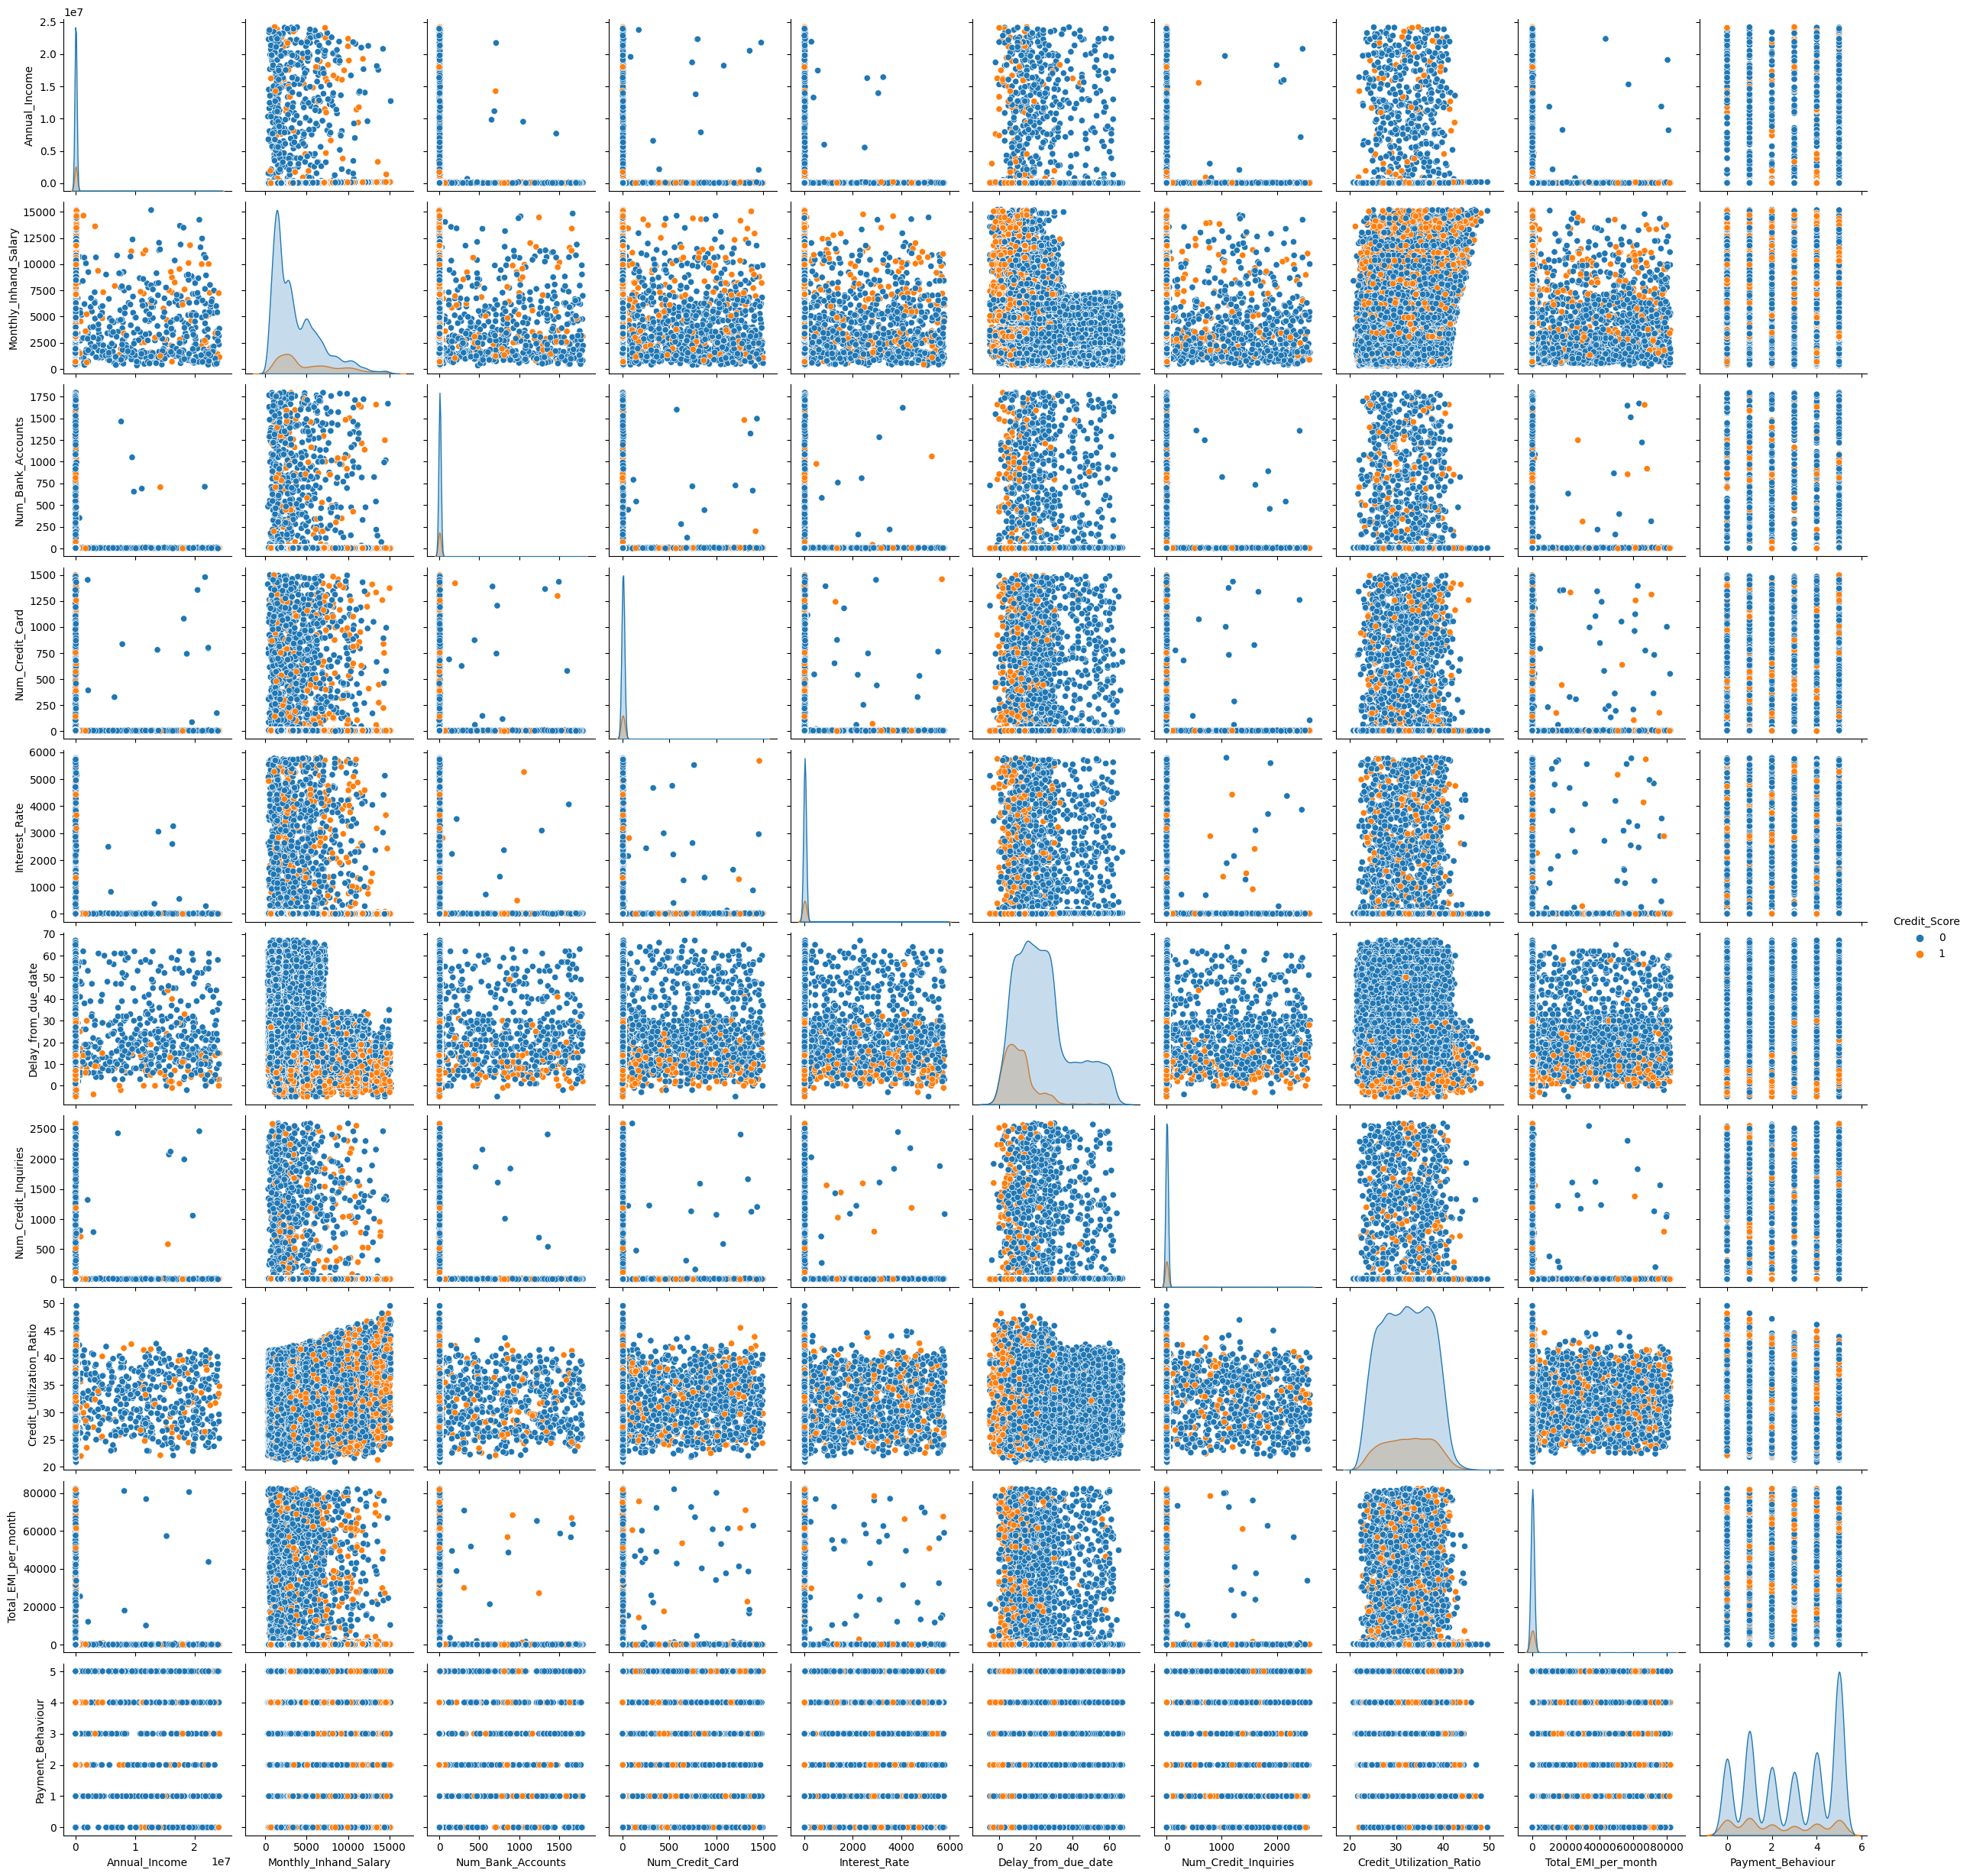

In [8]:
# Step 2: Perform Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='Credit_Score', diag_kind='kde')
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Step 4: Train the models
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [11]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [12]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [13]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)


Logistic Regression Metrics:
Accuracy: 0.8418159609120521
Precision: 1.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.3893113142508548


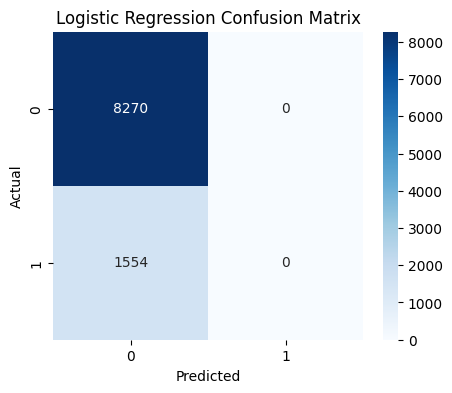

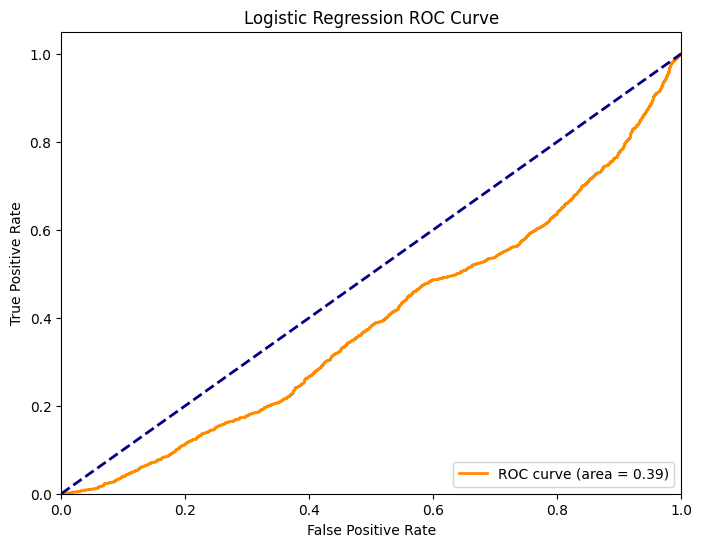


Random Forest Metrics:
Accuracy: 0.8967833876221498
Precision: 0.7253756260434057
Recall: 0.5592020592020592
F1-Score: 0.6315406976744187
ROC-AUC: 0.9114326020613809


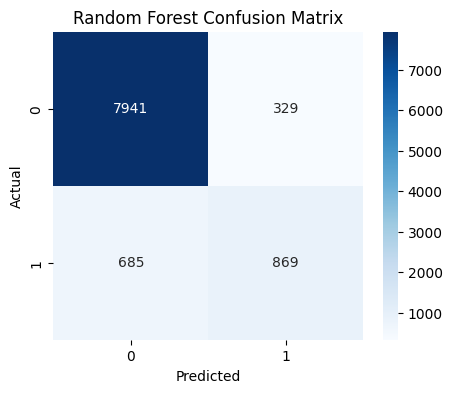

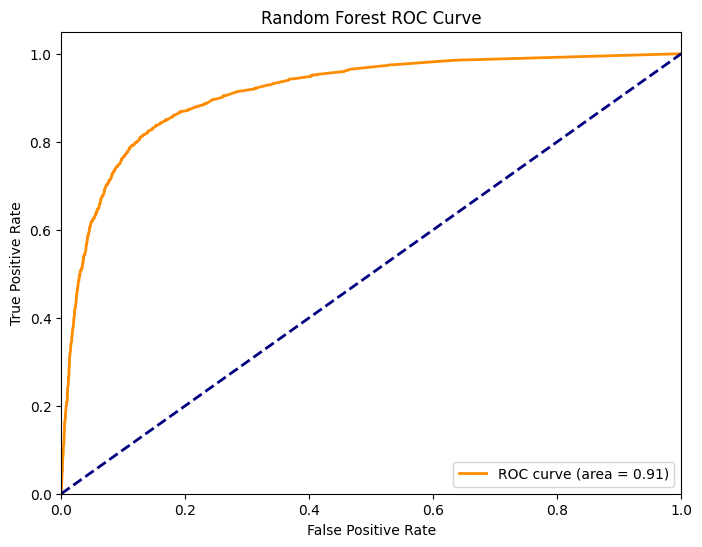


Gradient Boosting Metrics:
Accuracy: 0.8632939739413681
Precision: 0.7175257731958763
Recall: 0.22393822393822393
F1-Score: 0.34134379597842074
ROC-AUC: 0.8231382055747232


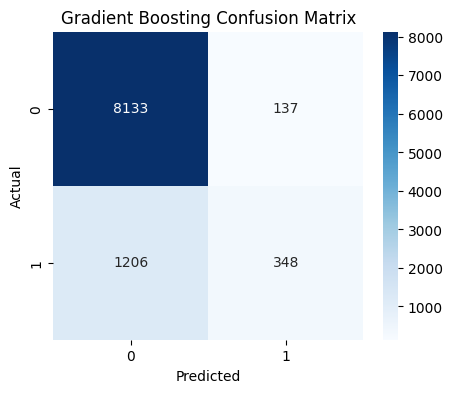

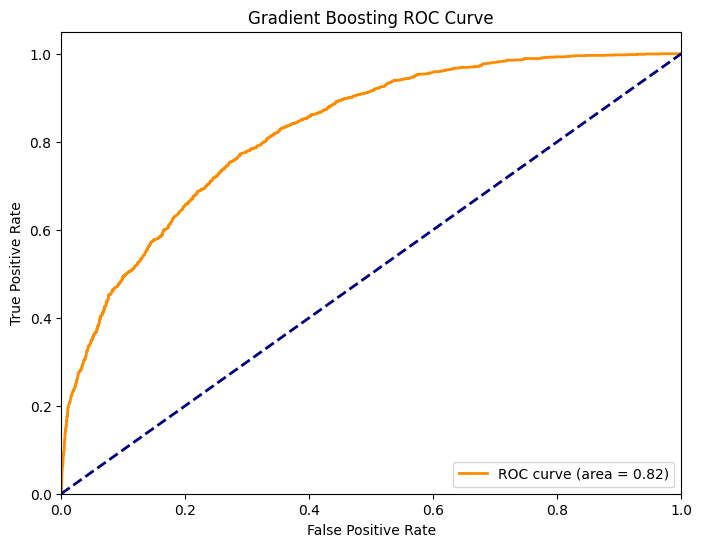


Support Vector Machine Metrics:
Accuracy: 0.8418159609120521
Precision: 1.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.37001952289134876


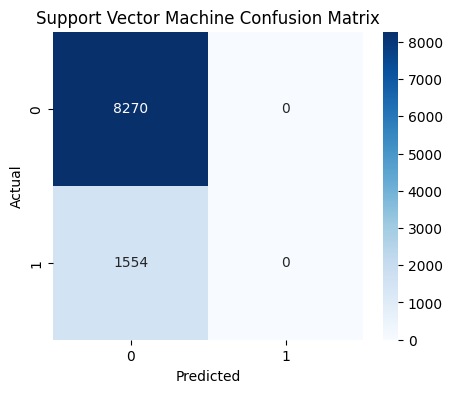

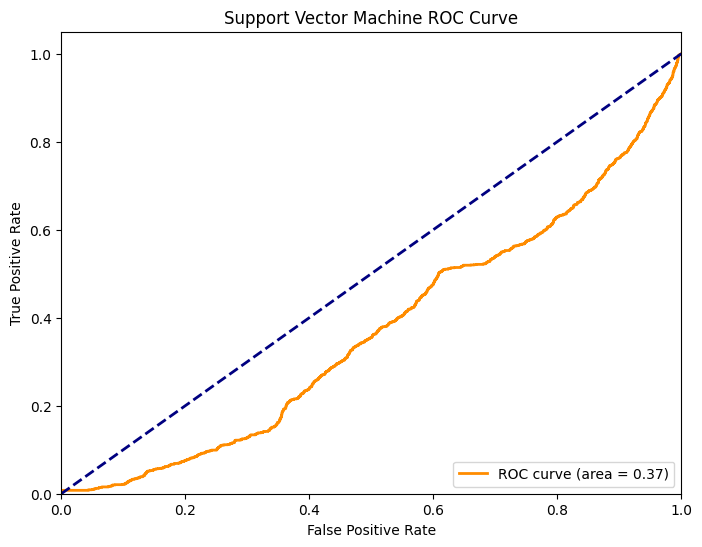

In [24]:
# Step 5: Evaluate the models
models = [logistic_model, rf_model, gb_model, svm_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']

for model, name in zip(models, model_names):
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]

    # Model evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, zero_division=1)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)

    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    # Alternative ROC Curve (for older scikit-learn versions)
    from sklearn.metrics import roc_curve, auc
    # Get ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



In [25]:
# Step 6: Add a column for predicted Credit Worthiness to the original dataset using Random Forest model
data['Credit_Worthiness'] = rf_model.predict(features)

In [26]:
data.to_csv('train_with_credit_worthiness.csv', index=False)